<a href="https://colab.research.google.com/github/Curovearth/Fake-or-Real-News/blob/main/Fake_or_Real_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Fake or Real News**
---

* Mounting Google drive to access the dataset files

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


---
### Setting up the Libraries

In [2]:
import numpy as np
import os
import pandas as pd


*   *warnings.filterwarnings(action='ignore')* → never print matching warnings
*   *plotly* → Helpful in building figures
*   *seaborn* → Statistical data visualisation
*   *rcParams* → Runtime configuration settings 

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

**spacy**: library for advanced Naturual Language Processing in python

*'en_core_web_sm'*

*   en → English
*   core → Vocabulary, syntax, entities
*   web → written text(blogs, news, comments)
*   sm → 12 mb



In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')

---
### Accessing the directory comprising the dataset

In [5]:
list_of_files = []
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/LSM and TARP '):
  list_of_files.append(filenames)
tarp_content = list_of_files[0]
for filename in tarp_content:
  print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/fake2.csv
/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/fake_or_real_news.csv
/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/Fake.csv
/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/True.csv
/content/gdrive/MyDrive/LSM and TARP /Cell Segmentation Data/images/news_articles.csv


---
### Analysing the Dataset

In [6]:
true_df = pd.read_csv("/content/gdrive/MyDrive/LSM and TARP /True.csv")
print('length of the dataset:',len(true_df))
print('-----------------------------------------------------')
true_df.head()

length of the dataset: 21417
-----------------------------------------------------


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
false_df = pd.read_csv("/content/gdrive/MyDrive/LSM and TARP /Fake.csv")
print('length of the dataset:',len(false_df))
print('-----------------------------------------------------')
false_df.head()

length of the dataset: 23481
-----------------------------------------------------


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


---
## Visualising Datasets

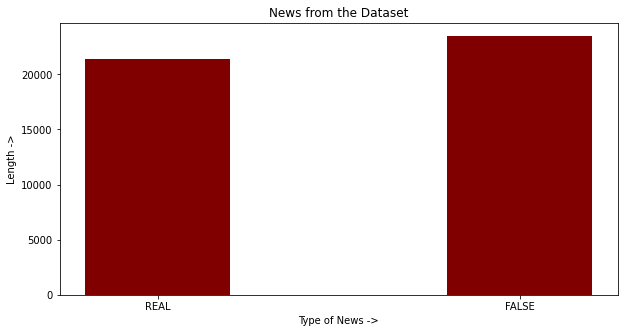

In [8]:
bar_data = {'REAL': len(true_df),'FALSE': len(false_df)}
news = list(bar_data.keys())
val = list(bar_data.values())

fig = plt.figure(figsize=(10,5))

# Creating the bar plot
plt.bar(news, val, color='maroon',width=0.4)
plt.xlabel('Type of News ->')
plt.ylabel('Length ->')
plt.title('News from the Dataset')
plt.show()

In [9]:
colors = ['gold','green']

fig = go.Figure(data=[go.Pie(labels=news, values=val, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

---

In [10]:
true_df['class'] = 1    # adding another column 'class' and assigning every value as 1
false_df['class'] = 0   # adding another column 'class' and assigning every value as 0

# concatenate pandas object along a particular axis 
fake_news_df = pd.concat([true_df, false_df])

In [11]:
fake_news_df[21415:21419]  # how the concatenation looks like

,title,text,subject,date,class
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0


In [12]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


---
## Sampling the dataframe

**Sample**:  to get a random sample of items from an axis of object

1.   *n* → used to specify the number of randomly selected rows or columns to be returned from the DataFrame.
2.   *random_state* → used to specify the seed value which will used in the random number generator

In [13]:
fake_news_df = fake_news_df.sample(10000, random_state=786).reset_index(drop=True)

In [14]:
fake_news_df.head()

,title,text,subject,date,class
0,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016",0
1,GAY PAYPAL CEO Gives Rousing Speech Endorsing ...,,politics,"Oct 31, 2016",0
2,"Buoyed by mayoral votes, Venezuela socialists ...",CARACAS (Reuters) - President Nicolas Maduro h...,worldnews,"December 10, 2017",1
3,Oklahoma lawmaker apologizes for linking Nativ...,"TULSA, Okla. (Reuters) - An Oklahoma state leg...",politicsNews,"April 28, 2016",1
4,Argentine mid-term campaign pauses after body ...,BUENOS AIRES (Reuters) - Major parties running...,worldnews,"October 18, 2017",1


In [15]:
len(fake_news_df)

10000

---
### Checking Target Balance

In [16]:
colors = ['gold','blue']
labels = ['REAL','FAKE']
values = fake_news_df['class'].value_counts()/fake_news_df['class'].shape[0]

print('value counts:\n',fake_news_df['class'].value_counts())
print('shape[0] for fake_news_df[\'class\']:', fake_news_df['class'].shape[0])

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Target Balance",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

value counts:
 0    5234
1    4766
Name: class, dtype: int64
shape[0] for fake_news_df['class']: 10000


Target seems to be well balanced !


---
## NLP text classification using PyCaret

**What is NLP?** [(Source)](http://www.pycaret.org/tutorials/html/NLP101.html)

Natural Language Processing (NLP in short) is a branch of artificial intelligence that deals with analyzing, understanding and generating the languages that humans use naturally in order to interface with computers in both written and spoken contexts using natural human languages instead of computer languages

**PyCaret** → low code ML library, spending less time on coding and more time on analysis.
[[Ref]](https://pycaret.org/)
> PyCaret and NLP → https://pycaret.gitbook.io/docs/

For installing pycaret run the following command before `!pip install pycaret`

### Setting up

In [17]:
!pip install pycaret[full]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 7.4 MB/s 
     |████████████████████████████████| 3.3 MB 61.4 MB/s 
     |████████████████████████████████| 636 kB 74.3 MB/s 
     |████████████████████████████████| 262 kB 69.7 MB/s 
     |████████████████████████████████| 2.0 MB 55.4 MB/s 
     |████████████████████████████████| 1.7 MB 57.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 44.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 167 kB 72.1 MB/s 
     |████████████████████████████████| 1.3 MB 62.5 MB/s 
     |████████████████████████████████| 56 kB 6.2 MB/s 
     |████████████████████████████████| 17.0 MB 56.2 MB/s 
     |████████████████████████████████

In [18]:
from pycaret.nlp import *

fake_news_nlp = setup(data = fake_news_df, target='text',session_id=123)

Description,Value
session_id,123
Documents,10000
Vocab Size,40200
Custom Stopwords,False


INFO:logs:setup() succesfully completed......................................


Once the setup is succesfully executed it prints the information grid with the following information:

* `session_id` : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment session_id is set as 123 for later reproducibility.

* `Documents` : Number of documents (or samples in dataset if dataframe is passed).

* `Vocab Size` : Size of vocabulary in the corpus after applying all text pre-processing such as removal of stopwords, bigram/trigram extraction, lemmatization etc.

---

## **Latent Dirichlet Allocation**

* Popular form of statistical topic modeling where documents are represented as a mixture of topics and a topic is a bunch of words. Those topics reside within a hidden, also known as a latent layer.

### *Why do we need LDA?*

Stating an example
* I want to find out the news highlights of France in 2018. I'm given a dataset which contains all the news articles of the country from 2018
* I make use of LDA to find out topics
* eg. France won 2018 World cup

> Therefore, by annotating the document, based on the topics predicted by the modeling method, we are able to optimize our search process

### *How do we do LDA?*

1.  Create a collection of documents from news articles
2.  Each documents represents a new article
3.  Data cleaning is the next step
   * Tokenizing: converting a document to its atomic elements
   * Stopping: removing meaningless words
   * Stemming: merging words that are equivalent in meaning.

> For more understanding visit this amazing article: [towardsdatascience on LDA](https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2)



## **How does LDA work?**

There are 2 parts in LDA


1.   The words that belong to a document, that we already know
2.   The words that belong to a topic or the probability of words belonging into a topic, that we need to calculate.

### *Algorithm for the latter*

* Parse through each document and randomly assign each word in the doc to one of the k topics(k to be chose beforehand)
* For each doc d, go through each word w and compute the following:

   1. `p(topic t | document d)` : the proportion of words in document d that are assigned to topic t. 
   2. `p(word w | topic t)` : the proportion of assignments to topic t over all documents that come from this word w.Tries to capture how many documents are in topic t because of word w. 



## Creation of LDA Model 

* A topic model is created using `create_model()` function which takes one mandatory parameter i.e., name of model as a string which in our case is `lda`

In [19]:
lda = create_model('lda', multi_core=True)

INFO:logs:LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


In [20]:
print(lda)

LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100)


---
### Embedding on the processed text data

We have created the model, we would like to assign the topic proportions to our dataset to analyze the results.

In [21]:
lda_df = assign_model(lda)

INFO:logs:(10000, 11)
INFO:logs:assign_model() succesfully completed......................................


In [22]:
lda_df.head()

,title,text,subject,date,class,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Trump Is Now Officially Increasing The Chance...,republican smart lot thing unfortunate mental ...,News,"April 17, 2016",0,0.053292,0.749572,0.195045,0.002090,Topic 1,0.75
1,GAY PAYPAL CEO Gives Rousing Speech Endorsing ...,,politics,"Oct 31, 2016",0,0.250000,0.250000,0.250000,0.250000,Topic 0,0.25
2,"Buoyed by mayoral votes, Venezuela socialists ...",sight presidential election rule socialist par...,worldnews,"December 10, 2017",1,0.840523,0.056264,0.061532,0.041681,Topic 0,0.84
3,Oklahoma lawmaker apologizes for linking Nativ...,legislator apologize say legislature native_am...,politicsNews,"April 28, 2016",1,0.194536,0.301954,0.002837,0.500673,Topic 3,0.50
4,Argentine mid-term campaign pauses after body ...,buenos_aire reuter major party run mid_term co...,worldnews,"October 18, 2017",1,0.445267,0.001756,0.368154,0.184823,Topic 0,0.45


---
### Plotting the trained Model

> This function takes a trained model object (optional) and returns a plot based on the inferred dataset by internally calling assign_model before generating a plot. Where a model parameter is not passed, a plot on the entire dataset will be returned instead of one at the topic level. As such, plot_model can be used with or without model. All plots with a model parameter passed as a trained model object will return a plot based on the first topic i.e. ‘Topic 0’. This can be changed using the topic_num param. 

In [23]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [31]:
plot_model(lda)

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), plot=frequency, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: frequency
INFO:logs:Rendering Visual
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(10000, 11)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting CountVectorizer()


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [25]:
plot_model(lda, plot='topic_distribution')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), plot=topic_distribution, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: topic_distribution
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(10000, 11)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Sorting Dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), plot=wordcloud, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: wordcloud
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(10000, 11)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting WordCloud()
INFO:logs:Rendering Visual


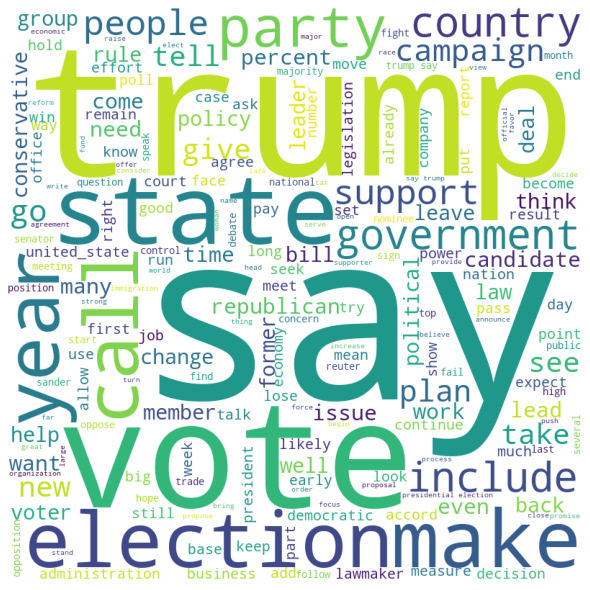

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(lda, plot='wordcloud')

In [27]:
plot_model(lda, plot='bigram')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), plot=bigram, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: bigram
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(10000, 11)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting CountVectorizer()
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
lda_df.drop(["text","title","subject","date"],axis=1, inplace=True, errors='ignore')

In [30]:
plot_model(lda, plot='frequency',topic_num='Topic 1')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), plot=frequency, topic_num=Topic 1, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: frequency
INFO:logs:Rendering Visual
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=40200, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(10000, 11)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting CountVectorizer()


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


---
## Building the Model

In [37]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from pycaret.classification import *

setup(data=lda_df,target='class', silent=True)

,Description,Value
0,session_id,8771
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

('f55f',
 'class',
        Topic_0   Topic_1   Topic_2   Topic_3  Perc_Dominant_Topic  \
 0     0.053292  0.749572  0.195045  0.002090                 0.75   
 1     0.250000  0.250000  0.250000  0.250000                 0.25   
 2     0.840523  0.056264  0.061532  0.041681                 0.84   
 3     0.194536  0.301954  0.002837  0.500673                 0.50   
 4     0.445267  0.001756  0.368154  0.184823                 0.45   
 ...        ...       ...       ...       ...                  ...   
 9995  0.028361  0.495934  0.460351  0.015354                 0.50   
 9996  0.377023  0.070258  0.001601  0.551118                 0.55   
 9997  0.001493  0.775963  0.159099  0.063445                 0.78   
 9998  0.002259  0.002287  0.659521  0.335933                 0.66   
 9999  0.105688  0.040623  0.135407  0.718282                 0.72   
 
       Dominant_Topic_Topic 0  Dominant_Topic_Topic 1  Dominant_Topic_Topic 2  \
 0                        0.0                     1.0     

In [39]:

compare_models(sort='Accuracy',n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8824,0.9491,0.8722,0.8812,0.8765,0.7643,0.7646,0.769
catboost,CatBoost Classifier,0.8820,0.9500,0.8710,0.8812,0.8760,0.7634,0.7636,3.690
lightgbm,Light Gradient Boosting Machine,0.8784,0.9480,0.8692,0.8760,0.8725,0.7563,0.7565,0.281
rf,Random Forest Classifier,0.8773,0.9439,0.8626,0.8789,0.8706,0.7539,0.7542,1.105
xgboost,Extreme Gradient Boosting,0.8767,0.9449,0.8671,0.8744,0.8706,0.7529,0.7531,0.654
ada,Ada Boost Classifier,0.8758,0.9458,0.8659,0.8740,0.8697,0.7511,0.7515,0.263
lr,Logistic Regression,0.8741,0.9396,0.8812,0.8596,0.8701,0.7481,0.7484,0.428
ridge,Ridge Classifier,0.8703,0.0000,0.8779,0.8551,0.8663,0.7403,0.7408,0.015
lda,Linear Discriminant Analysis,0.8703,0.9373,0.8779,0.8551,0.8663,0.7403,0.7408,0.020
et,Extra Trees Classifier,0.8691,0.9389,0.8540,0.8703,0.8620,0.7376,0.7378,0.722


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8771, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), <catboost.core.CatBoostClassifier object at 0x7faa78243f90>, LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learnin

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=8771, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

In [40]:
catboost = create_model('catboost',verbose=False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=catboost, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:CatBoost Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17

In [47]:
lightgbm = create_model('lightgbm',verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 29
INFO:logs:master_model_c

---
### Interpreting the Model

In [49]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 7.7 MB/s 
     |████████████████████████████████| 25.3 MB 3.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x7faa782500d0>, use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


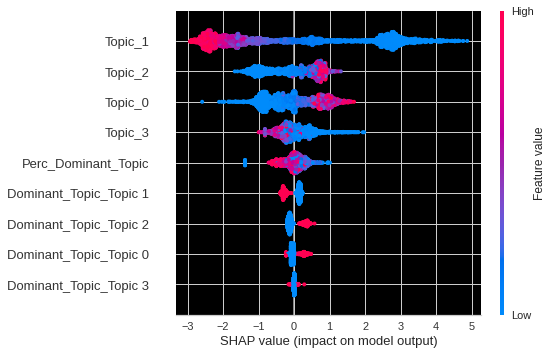

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [52]:
with plt.rc_context({'axes.facecolor':'black'}):
  interpret_model(catboost)

Topic_1 is the most important feature

---

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8771, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


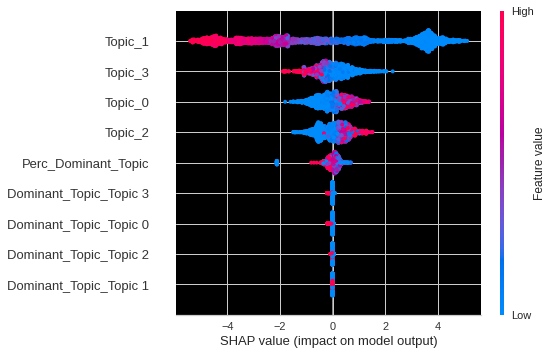

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [53]:
with plt.rc_context({'axes.facecolor':'black'}):
    interpret_model(lightgbm)

---
## Tuning Hyperparameters

In [54]:
%time
tuned_catboost = tune_model(catboost, optimize = 'Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8871,0.9571,0.8776,0.8855,0.8816,0.7738,0.7738
1,0.8843,0.9482,0.8657,0.8896,0.8775,0.7679,0.7681
2,0.8929,0.9510,0.8776,0.8963,0.8869,0.7851,0.7853
3,0.8757,0.9452,0.8567,0.8804,0.8684,0.7507,0.7509
4,0.8600,0.9449,0.8597,0.8496,0.8546,0.7196,0.7197
5,0.8843,0.9528,0.9075,0.8588,0.8824,0.7687,0.7698
6,0.8686,0.9377,0.8567,0.8671,0.8619,0.7365,0.7366
7,0.8871,0.9541,0.8597,0.9000,0.8794,0.7735,0.7742
8,0.8871,0.9522,0.9134,0.8596,0.8857,0.7745,0.7758


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 16
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7faa78082410>
INFO:logs:tune_model() succesfully completed......................................


In [55]:
%time
tuned_lightgbm = tune_model(lightgbm, optimize = 'Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8900,0.9571,0.8836,0.8862,0.8849,0.7796,0.7796
1,0.8900,0.9503,0.8746,0.8933,0.8839,0.7794,0.7796
2,0.8957,0.9533,0.8836,0.8970,0.8902,0.7909,0.7910
3,0.8814,0.9491,0.8537,0.8938,0.8733,0.7620,0.7627
4,0.8586,0.9450,0.8687,0.8410,0.8546,0.7170,0.7174
5,0.8814,0.9526,0.8896,0.8663,0.8778,0.7627,0.7629
6,0.8657,0.9389,0.8507,0.8663,0.8584,0.7307,0.7308
7,0.8871,0.9531,0.8746,0.8879,0.8812,0.7737,0.7738
8,0.8914,0.9566,0.9075,0.8711,0.8889,0.7828,0.7835


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 17
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=21, min_child_weight=0.001, min_split_gain=0,
               n_estimators=90, n_jobs=-1, num_leaves=8, objective=None,
               random_state=8771, reg_alpha=1e-07, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


---
## Voting Classifier

In [56]:
blend_soft = blend_models(estimator_list = [lightgbm,catboost], optimize = 'Accuracy',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8829,0.9591,0.8746,0.8799,0.8772,0.7652,0.7652
1,0.8900,0.9505,0.8716,0.8957,0.8835,0.7794,0.7796
2,0.8914,0.9503,0.8776,0.8936,0.8855,0.7823,0.7824
3,0.8771,0.9498,0.8507,0.8879,0.8689,0.7534,0.7540
4,0.8571,0.9429,0.8657,0.8406,0.8529,0.7141,0.7144
5,0.8829,0.9518,0.8866,0.8710,0.8787,0.7655,0.7656
6,0.8729,0.9380,0.8507,0.8796,0.8649,0.7449,0.7453
7,0.8986,0.9536,0.8776,0.9074,0.8923,0.7965,0.7969
8,0.8871,0.9561,0.8985,0.8699,0.8840,0.7742,0.7746


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 18
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=8771, reg_alpha=0.0,
                                             reg_lambda=0.0, silen

---

## Calibrating Model

In [ ]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8957,0.9608,0.8705,0.9060,0.8879,0.7905,0.7910
1,0.8886,0.9463,0.8795,0.8848,0.8822,0.7765,0.7765
2,0.8643,0.9412,0.8705,0.8475,0.8588,0.7282,0.7285
3,0.8886,0.9502,0.8614,0.8994,0.8800,0.7761,0.7767
4,0.8771,0.9480,0.8584,0.8796,0.8689,0.7533,0.7535
5,0.8743,0.9522,0.8675,0.8675,0.8675,0.7479,0.7479
6,0.8829,0.9536,0.8554,0.8931,0.8738,0.7646,0.7652
7,0.8857,0.9568,0.8912,0.8702,0.8806,0.7710,0.7712
8,0.8629,0.9386,0.8761,0.8406,0.8580,0.7255,0.7261


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 8
INFO:logs:CalibratedClassifierCV(base_estimator=VotingClassifier(estimators=[('lightgbm',
                                                                    LGBMClassifier(boosting_type='gbdt',
                                                                                   class_weight=None,
                                                                                   colsample_bytree=1.0,
                                                                                   importance_type='split',
                                                                                   learning_rate=0.1,
                                                                                   max_depth=-1,
                                                                                   min_child_samples=20,
                                                                                 

In [ ]:
final_model = finalize_model(cali_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=CalibratedClassifierCV(base_estimator=VotingClassifier(estimators=[('lightgbm',
                                                                    LGBMClassifier(boosting_type='gbdt',
                                                                                   class_weight=None,
                                                                                   colsample_bytree=1.0,
                                                                                   importance_type='split',
                                                                                   learning_rate=0.1,
                                                                                   max_depth=-1,
                                                                                   min_child_samples=20,
                                                                                   min_child_weight=0.001,
              

---

## Plotting Results

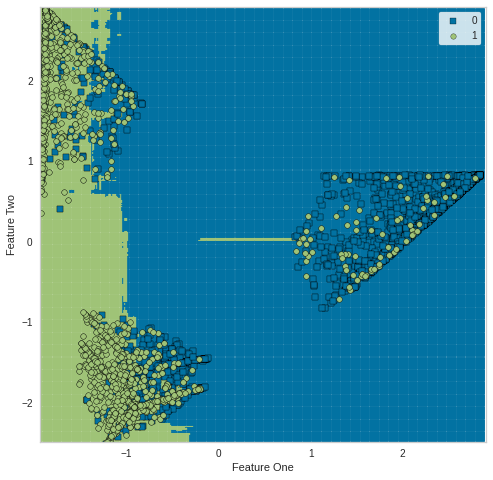

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

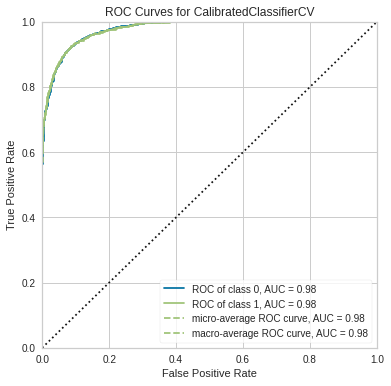

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='auc')

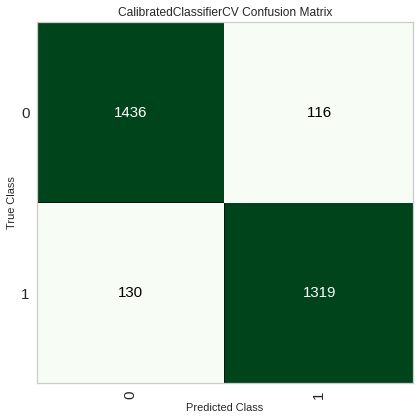

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='confusion_matrix')

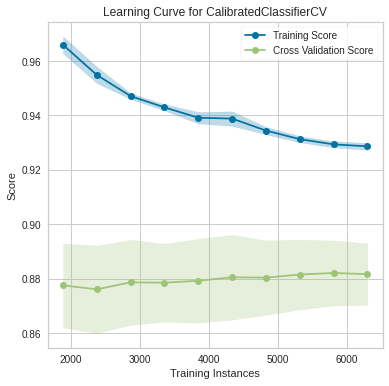

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='learning')